### ライブラリをインポート

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

### CSVファイルを読み込む

In [2]:
# train_tmp,train_dummy,train_dummy_1,train_dummy_2をCSVから読み込む。
train_tmp = pd.read_csv('train_tmp.csv')
train_dummy = pd.read_csv('train_dummy.csv')
train_dummy_1 = pd.read_csv('train_dummy_1.csv')
train_dummy_2 = pd.read_csv('train_dummy_2.csv')

In [3]:
#データの確認
print(train_tmp.shape)
print(train_dummy.shape)
print(train_dummy_1.shape)
print(train_dummy_2.shape)

(1952, 48)
(1952, 125)
(1798, 125)
(154, 125)


### モデル作成

In [6]:
# 観客数を抽出する
y_1 = train_dummy_1['y']

# train_dummy_1からid,yを削除する
train_dummy_1.drop(['id','y'],axis=1,inplace=True)

# train_dummy_1を学習データと評価データに分割する。
X_train,X_test,y_train,y_test = train_test_split(train_dummy_1, y_1, random_state = 1234)

# 確認
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1348, 123)
(450, 123)
(1348,)
(450,)


### 重回帰モデル作成

In [7]:
# scikit-learnからLinearRegressionをインポートしましょう。
from sklearn.linear_model import LinearRegression

# モデルの箱を代入する変数名をlrとし、モデルを表す箱を準備しましょう。
lr = LinearRegression()
# 学習データの説明変数を表す変数X_trainと、目的変数を表す変数y_trainを用いて、モデルの学習を行いましょう。
lr.fit(X_train, y_train)

# 確認
print(pd.DataFrame(lr.coef_,index=X_train.columns))
print(lr.intercept_)

                           0
capa                0.283059
tv_num            289.377840
month             283.045647
week_日           -467.702592
week_月             96.243691
...                      ...
weather_雨のち曇    -2246.047460
weather_雨のち曇時々晴     0.000000
weather_雨時々晴     4880.687608
weather_雨時々曇    -5027.936004
weather_雪のち雨    -1723.565932

[123 rows x 1 columns]
-3227.593913856934


In [18]:
# 予測
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# 確認
print(y_pred_test)
print(y_pred_train)

[ 3929.45813146 19223.55575693 15581.8774807  12357.8425487
  4283.47009292  2101.98847933  4475.11579235 10161.71245993
  6664.34367324  2677.03492947  1480.59994138 14235.96046509
 14355.25418917  4720.19373548  3953.91113237 18692.51371826
  7299.00813132  3140.7232414   8316.70914823 24150.6656063
  4885.89520393  5317.32129861  6657.08951889  5464.74529587
 25288.51829525 11633.86022037  8815.23558496  5026.77773706
  5891.86123426 22899.04360695 17060.88969791  9135.1315963
  8977.61483088  7129.63960603 24900.45706019 15084.05125719
  7579.98662441  6251.01744761 16684.77371923  2510.19406754
 22874.90113818  5928.48312047  7108.83125911 13871.31034656
  6903.9611969  12676.7677362   8880.06879774 12378.72024644
  4604.79408287 18799.34270985  7645.62227537 24869.02587272
 17026.1341063   8818.3239096  11090.88994698  3248.6841535
 14228.25561388  3578.46286437  4615.05929615 13670.13522863
 15332.92674704  5712.205155    5578.48758876 10474.60062276
  5464.33396332 11308.665730

### 評価関数(RMSE)

In [9]:
# ライブラリのインポート
import numpy as np
from sklearn.metrics import mean_squared_error as MSE


In [19]:
# RMSEを算出する。
rmse_test = np.sqrt(MSE(y_test,y_pred_test))
rmse_train = np.sqrt(MSE(y_train,y_pred_train))

# RMSEの表示
print(rmse_test)
print(rmse_train)

3379.5922492789864
3098.864919822003


### 予測精度の可視化

In [14]:
print(max(y_test))
print(max(y_pred_test))
print(min(y_test))
print(min(y_pred_test))


54905
41401.014384257054
1104
-5917.486518305584


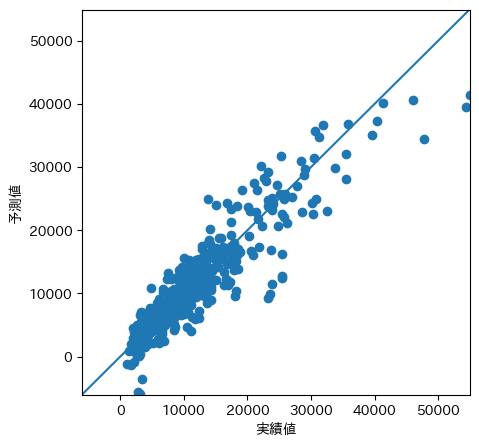

In [16]:
# 1.グラフのサイズを指定し、グラフの大きさを正方形になるように設定する
plt.figure(figsize=(5,5))

# 2.横軸を実測値、縦軸を予測値として、散布図を描く
plt.scatter(y_test,y_pred_test)

# 値域を揃える為に、y_test、y_pred_testの両方を見た上での最小値と最大値を求める
min_value = -6000.0
max_value = 54905.0

# 3.最小値と最大値を使い、x軸およびy軸の値域を指定する
plt.xlim([min_value,max_value])
plt.ylim([min_value,max_value])

# 4.対角線を描く
plt.plot([min_value,max_value],[min_value,max_value])

#x軸とy軸に名前を付ける
plt.xlabel("実績値")
plt.ylabel("予測値")

# 可視化結果を表示する為に必要な関数
plt.show()

### 残差分析

In [23]:
#  X_trainに予測値カラム(pred)を追加してください
X_train['pred'] = y_pred_train
# X_trainに実測値から予測値を引いた残差カラムを追加してください
X_train['res'] =  y_train - y_pred_train
# 同様の操作をX_testに関しても行ってください
X_test['pred']  = y_pred_test
X_test['res'] = y_test - y_pred_test

# 確認
print(X_train.head(1))
print(X_test.head(1))

# X_trainとX_testを結合する
X_tmp = pd.concat([X_train,X_test])

# X_tmpのpredとresをX_dummy_1に結合する
train_dummy_1 = pd.concat([train_dummy_1,X_tmp['pred'],X_tmp['res']],axis=1)

# 確認
print(train_dummy_1.head(1))

      capa  tv_num  month  week_日  week_月  week_木  week_水  week_火  week_金  \
823  40728       2      8       0       0       0       0       0       0   

     home_アルビレックス新潟  ...  weather_曇時々雨のち晴  weather_雨  weather_雨のち晴  \
823               0  ...                0          0             0   

     weather_雨のち曇  weather_雨のち曇時々晴  weather_雨時々晴  weather_雨時々曇  weather_雪のち雨  \
823             0                0             0             0             0   

             pred        res  
823  14876.000946  48.999054  

[1 rows x 125 columns]
       capa  tv_num  month  week_日  week_月  week_木  week_水  week_火  week_金  \
1792  22563       3      4       1       0       0       0       0       0   

      home_アルビレックス新潟  ...  weather_曇時々雨のち晴  weather_雨  weather_雨のち晴  \
1792               0  ...                0          1             0   

      weather_雨のち曇  weather_雨のち曇時々晴  weather_雨時々晴  weather_雨時々曇  weather_雪のち雨  \
1792             0                0             0             0             

In [24]:
# 残差が大きい順に20個表示する
print(train_dummy_1.sort_values(by = 'res', ascending = False ).head(20))

       capa  tv_num  month  week_日  week_月  week_木  week_水  week_火  week_金  \
1707  72327       3     11       0       0       0       0       0       0   
1442  40000       4      5       0       0       0       0       0       0   
1408  47816       3      4       0       0       0       0       0       0   
693   63700       3      3       0       0       0       0       0       0   
1462  63700       3      5       0       0       0       0       0       0   
1417  49970       2      4       0       0       0       0       0       0   
1480  24490       2      7       0       0       0       1       0       0   
1384  40728       2      3       1       0       0       0       0       0   
586   40000       3      9       1       0       0       0       0       0   
1359  47816       3      3       0       0       0       0       0       0   
942   63700       3     12       0       0       0       0       0       0   
895   63700       3     10       0       0       0       0      

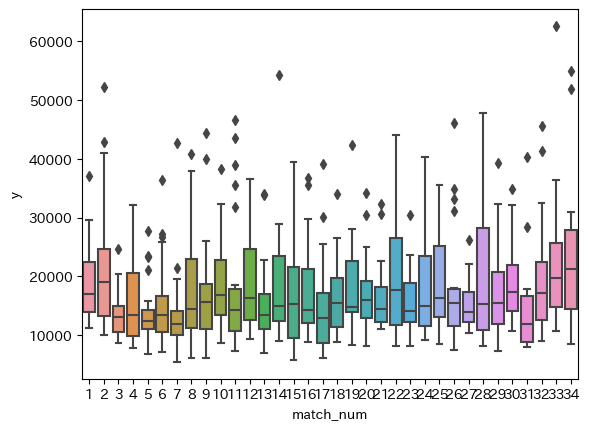

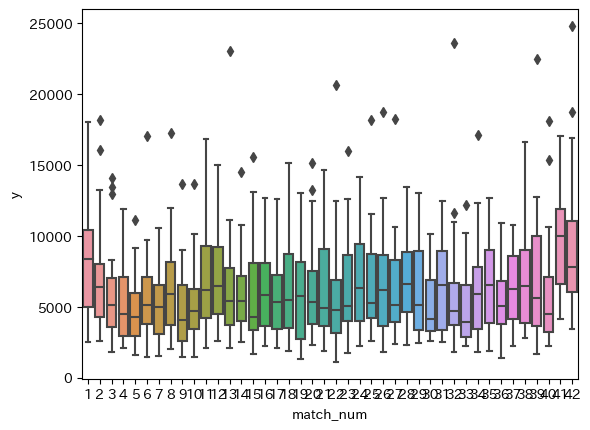

In [28]:
# stageがJ1のデータで、match_numをx軸、yをy軸にした箱ひげ図を描いてください。
sns.boxplot(data=train_tmp[train_tmp['stage']=='Ｊ１'], x='match_num', y='y')
# 可視化結果を表示する為に必要な関数
plt.show()

# stageがJ2のデータで、match_numをx軸、yをy軸にした箱ひげ図を描いてください。
sns.boxplot(data=train_tmp[train_tmp['stage']=='Ｊ２'], x='match_num', y='y')
# 可視化結果を表示する為に必要な関数
plt.show()

In [29]:
# 最後の２節であることを表すlast_matchカラムを作成する
train_tmp['last_match'] = 0
train_tmp['last_match'][((train_tmp['match_num'] == 33) | (train_tmp['match_num'] == 34)) & (train_tmp['stage'] == 'Ｊ１')] = 1
train_tmp['last_match'][((train_tmp['match_num'] == 41) | (train_tmp['match_num'] == 42)) & (train_tmp['stage'] == 'Ｊ２')] = 1

# last_matchカラムが作成できたか確認して、last_matchに該当する(1になっている)試合数を変数chkに入力してください。
print(train_tmp['last_match'].value_counts())


0    1872
1      80
Name: last_match, dtype: int64


C:\Users\cax68\AppData\Local\Temp\ipykernel_15220\3346447374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tmp['last_match'][((train_tmp['match_num'] == 33) | (train_tmp['match_num'] == 34)) & (train_tmp['stage'] == 'Ｊ１')] = 1
C:\Users\cax68\AppData\Local\Temp\ipykernel_15220\3346447374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tmp['last_match'][((train_tmp['match_num'] == 41) | (train_tmp['match_num'] == 42)) & (train_tmp['stage'] == 'Ｊ２')] = 1


In [31]:
# 2014年のawayがセレッソ大阪の試合を1にそれ以外を0にしたforlanカラムを作成
train_tmp['forlan'] = 0
train_tmp['forlan'][(train_tmp['year'] == 2014) & (train_tmp['away']=="セレッソ大阪")] = 1

# forlanカラムが作成できたかを確認
print(train_tmp['forlan'].value_counts())


0    1944
1       8
Name: forlan, dtype: int64


C:\Users\cax68\AppData\Local\Temp\ipykernel_15220\3175350377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_tmp['forlan'][(train_tmp['year'] == 2014) & (train_tmp['away']=="セレッソ大阪")] = 1


### モデルの再作成

In [33]:
# last_matchとforlanカラムを加える
select_columns = ['id','y','capa','week','home','away','month','stage','tv_num','weather','last_match','forlan']
train_dummy = pd.get_dummies(train_tmp[select_columns],drop_first=True)

train_dummy_1 = train_dummy[train_dummy['id'] <= 16084]
train_dummy_2 = train_dummy[train_dummy['id'] >= 16085]
y_1 = train_dummy_1['y']
train_dummy_1 = train_dummy_1.drop(columns=['id','y'])

X_train,X_test,y_train,y_test = train_test_split(train_dummy_1, y_1, random_state = 1234)

# モデルの作成
lr = LinearRegression()
# モデルの学習
lr.fit(X_train,y_train)

#訓練データの予測・精度評価
y_train_pred = lr.predict(X_train)
rmse_train = np.sqrt(MSE(y_train,y_train_pred))
print(rmse_train)

#テストデータの予測・精度評価
y_test_pred = lr.predict(X_test)
rmse_test = np.sqrt(MSE(y_test,y_test_pred))
print(rmse_test)

2965.3657528036433
3287.148041411054
